In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Read and Preprocess the Data

In [2]:
df_train = pd.read_csv("/workspaces/SVM/satellite_train.csv")
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [3]:
df_test = pd.read_csv("/workspaces/SVM/satellite_test.csv")
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [8]:
df_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,...,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000
mean,69.473957,83.855242,99.322886,82.555581,69.208794,83.499436,99.174521,82.480496,68.963472,83.131003,...,82.673957,69.033145,83.434273,99.183766,82.638106,68.797069,83.153326,99.061556,82.584442,3.650282
std,13.649635,22.725079,16.672166,18.695450,13.552423,22.811809,16.627583,18.714272,13.497858,22.813312,...,18.884322,13.533934,22.812090,16.741240,18.939820,13.437785,22.762684,16.660735,18.895513,2.217055
min,40.000000,27.000000,56.000000,33.000000,40.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,34.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000,1.000000
25%,60.000000,71.000000,85.000000,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,2.000000
50%,68.000000,87.000000,101.000000,83.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,100.000000,81.000000,3.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,103.000000,...,92.000000,79.500000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,5.000000
max,104.000000,137.000000,140.000000,154.000000,102.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,154.000000,104.000000,128.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,7.000000


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4435 entries, 0 to 4434
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      4435 non-null   int64   
 1   V2      4435 non-null   int64   
 2   V3      4435 non-null   int64   
 3   V4      4435 non-null   int64   
 4   V5      4435 non-null   int64   
 5   V6      4435 non-null   int64   
 6   V7      4435 non-null   int64   
 7   V8      4435 non-null   int64   
 8   V9      4435 non-null   int64   
 9   V10     4435 non-null   int64   
 10  V11     4435 non-null   int64   
 11  V12     4435 non-null   int64   
 12  V13     4435 non-null   int64   
 13  V14     4435 non-null   int64   
 14  V15     4435 non-null   int64   
 15  V16     4435 non-null   int64   
 16  V17     4435 non-null   int64   
 17  V18     4435 non-null   int64   
 18  V19     4435 non-null   int64   
 19  V20     4435 non-null   int64   
 20  V21     4435 non-null   int64   
 21  V22     4435 n

In [9]:
df_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,69.236000,83.017500,99.219000,82.675000,69.020500,82.676000,98.969000,82.534000,68.799000,82.365500,...,82.631000,68.746500,82.505500,98.952500,82.573500,68.573500,82.206000,98.625500,82.330000,3.709500
std,13.510276,23.222249,16.591585,19.343047,13.583127,23.046835,16.748053,19.438796,13.412626,22.967339,...,19.231062,13.402016,22.917604,16.625175,19.276628,13.323076,22.929074,16.772564,19.405318,2.207384
min,39.000000,27.000000,53.000000,34.000000,39.000000,27.000000,53.000000,34.000000,40.000000,27.000000,...,29.000000,40.000000,27.000000,53.000000,34.000000,39.000000,27.000000,56.000000,41.000000,1.000000
25%,60.000000,71.000000,85.000000,68.000000,60.000000,71.000000,85.000000,68.000000,60.000000,71.000000,...,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000,2.000000
50%,68.000000,87.000000,101.000000,81.000000,68.000000,85.000000,100.000000,81.000000,68.000000,84.500000,...,81.000000,67.500000,84.000000,100.000000,81.000000,68.000000,84.000000,100.000000,81.000000,3.000000
75%,80.000000,103.000000,113.000000,92.000000,79.000000,102.000000,112.000000,92.000000,79.000000,100.000000,...,92.000000,79.000000,102.000000,113.000000,92.000000,78.000000,102.000000,113.000000,92.000000,5.000000
max,101.000000,132.000000,139.000000,151.000000,104.000000,126.000000,139.000000,151.000000,101.000000,121.000000,...,151.000000,101.000000,130.000000,139.000000,151.000000,101.000000,127.000000,139.000000,151.000000,7.000000


In [19]:
# Convert the class column V37 to a categorical type using pandas.Series.astype('category')
df_train['V37'] = df_train['V37'].astype('category')
df_test['V37'] = df_test['V37'].astype('category')


In [20]:
# Renaming Class Labels to 1: red soil, 2: cotton crop, 3: grey soil, 4: damp grey soil, 5: soil with vegetation stubble, 6: mixture class (all types present), 7: very damp grey soil
class_mapping = {'1': 'red soil', '2': 'cotton crop', '3': 'grey soil', '4': 'damp grey soil', '5': 'soil with vegetation stubble', '6': 'mixture class (all types present)', '7': 'very damp grey soil'}
df_train['V37'].replace(class_mapping, inplace=True)
df_test['V37'].replace(class_mapping, inplace=True)


### Class Frequencies and Visualization

In [21]:
# Calculating class frequencies
class_freq = df_train['V37'].value_counts()

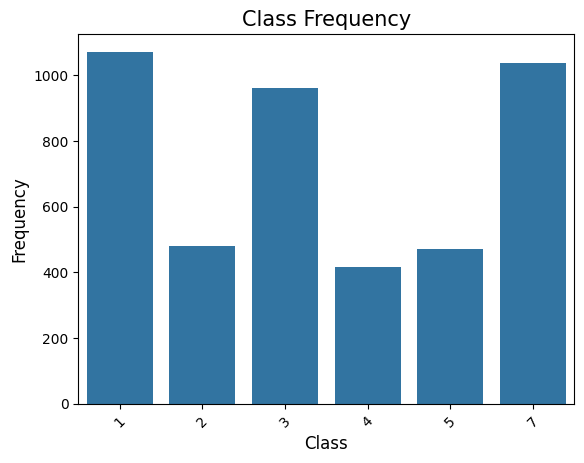

In [24]:
# Plotting Class Frequencies 
sns.barplot(x = class_freq.index, y = class_freq.values)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Class Frequency', fontsize=15)
plt.xticks(rotation = 45)
plt.show()

#### About the balance of classes:

Classes 1 and 7 have the highest frequency, indicating that the areas represented by red soil and very damp grey soil are more prevalent or more frequently observed in the dataset.

Classes 2 and 4 have a lower frequency relative to classes 1 and 7, but class 2 (cotton crop) appears to be more common than class 4 (damp grey soil).

Class 3 (grey soil) has the lowest frequency among all the classes, which may suggest that this type of land cover is less common in the area from which the data was collected or is less likely to be captured within the selected pixels.

Classes 5 and 6 are not shown in the chart, which could mean that they either are not present in the dataset or their frequency is too low to be visible on the scale used in the chart.

### Variable Selection and Scatter Plot

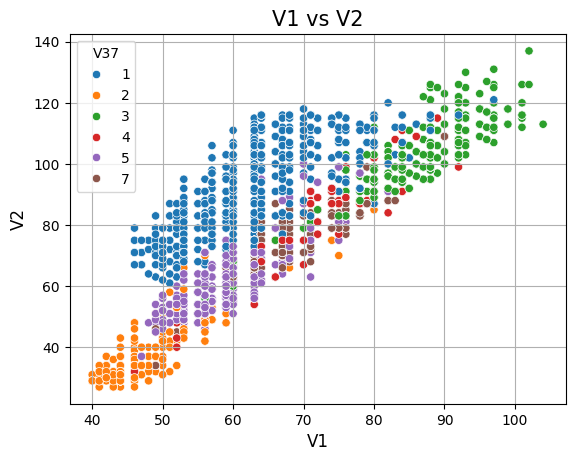

In [28]:
# Visualizing
sns.scatterplot(x = 'V1', y = 'V2', hue = 'V37', data = df_train)
plt.xlabel('V1', fontsize=12)
plt.ylabel('V2', fontsize=12)
plt.title('V1 vs V2', fontsize=15)
plt.grid(True)
plt.show()

 Class 1 and 7: Class 1 (lower V2 values) and class 7 (higher V2 values) are more linearly separable from each other compared to other classes.

Class 2, 3, and 4: These classes are mixed together throughout much of the V1 range, although class 2 seems to spread towards higher V2 values as V1 increases. This suggests that while there may be some trend within the data, the classes are not easily separable with a simple model.

Given these observations, it is expected that:

Classifier Performance: A classifier's accuracy would likely be moderate to low if trained only on these two features due to the considerable overlap of classes.
SVM Kernel Choice: A non-linear kernel, such as the Radial Basis Function (RBF) or polynomial kernel, might be more appropriate for this data since it could potentially capture the complex boundaries between the classes better than a linear kernel.

### Linear SVM with Hyperparameter Tuning

In [33]:


# Fit a linear SVM using only the two selected variables
svm_model = SVC(kernel='linear')

# Set the range of values for C to test
param_grid = {'C': [0.1, 1, 10, 100]}

# Use GridSearchCV to tune the cost (C) parameter
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(df_train[['V1', 'V2']], df_train['V37'])

# Get the optimal model
optimal_model = grid_search.best_estimator_

# Evaluate the optimal model using cross-validation error
cv_error = 1 - grid_search.best_score_

# Train the final model on the full training set
optimal_model.fit(df_train[['V1', 'V2']], df_train['V37'])

# Predict on the test set
y_pred = optimal_model.predict(df_test[['V1', 'V2']])

# Evaluate the model using confusion matrix and accuracy score
confusion_mat = confusion_matrix(df_test['V37'], y_pred)
accuracy = accuracy_score(df_test['V37'], y_pred)

confusion_mat, accuracy


(array([[431,   0,  17,   1,   3,   9],
        [  2, 185,   5,   0,  15,  17],
        [ 10,   0, 362,   1,   2,  22],
        [  7,   1,  75,   9,   1, 118],
        [ 15,   8,   6,   2, 135,  71],
        [ 11,   2,  45,   4,   9, 399]]),
 0.7605)

In [ ]:
# Define the SVC model with a linear kernel
svm_model = SVC(kernel='linear')

# Set the range of values for C to test
param_grid = {'C': [0.1, 1, 10, 100]}
